In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# TOPAS TCHZ (Thompson-Cox-Hastings pseudo-Voigt) parameters from LaB6 fit
tch_U = 0.0498809195
tch_V = 3.27081025e-05
tch_W = 0.000281433494
tch_X = 0.0333618858
tch_Y = 0.00487725316
tch_Z = 0.000280500449

# GSAS-II instrument parameters from LaB6 fit (note: fit is much worse, in part due to peak position errors from parallax)

# Fit Gaussian terms first (UVW), then fit Lorentzian terms (XYZ) while holding UVW fixed
g_U = 78.71
g_V = -3.99
g_W = 0.709
g_X = 0.823
g_Y = -3.115
g_Z = 0

# After refining all prms with starting guess from previous fit
g_U_2 = 23.3
g_V_2 = 19.378
g_W_2 = 0.494
g_X_2 = 0.907
g_Y_2 = -21.706
g_Z_2 = 0.093


tths = np.arange(0.5,15,0.001) # degrees 2theta
T_FWHMS = [] # TOPAS FWHMs
G_FWHMS = [] # GSAS-II FWHMs
G_FWHMS_2 = []

for tth in tths:

    th_rad = np.radians(tth/2)

    # TOPAS calculation
    fwhmg = np.sqrt(tch_U*np.tan(th_rad)**2 + tch_V*np.tan(th_rad) + tch_W + tch_Z/np.cos(th_rad)**2)
    fwhml = tch_X*np.tan(th_rad) + tch_Y/np.cos(th_rad)

    TCHZ_FWHM_deg = ((fwhmg ** 5) + (2.69269 * (fwhmg ** 4) * fwhml) + (2.42843 * (fwhmg ** 3) * (fwhml ** 2)) +
                                (4.47163 * (fwhmg ** 2) * (fwhml ** 3)) + (0.07842 * (fwhmg) * (fwhml ** 4)) + (
                                            fwhml ** 5)) ** 0.2
    T_FWHMS.append(TCHZ_FWHM_deg)

    # GSAS-II calculation
    sigma = np.sqrt(max(0.001,g_U*np.tan(th_rad)**2+g_V*np.tan(th_rad)+g_W)) # tand is just tan w/ conversion to radians inside function, so I replaced it with tan
    gamma = g_Z+g_X/np.cos(th_rad)+g_Y*np.tan(th_rad)

    s = sigma * np.sqrt(8*np.log(2)) # convert from stddev to gaussian FWHM
    g = gamma # lorentzian fwhm

    gamFW = np.exp(np.log(s**5+2.69269*s**4*g+2.42843*s**3*g**2+4.47163*s**2*g**3+0.07842*s*g**4+g**5)/5.) # PV FWHM (centidegrees)
    gamFW_deg = gamFW / 100
    G_FWHMS.append(gamFW_deg)

    # GSAS-II calculation (refined all prms)
    sigma = np.sqrt(max(0.001,g_U_2*np.tan(th_rad)**2+g_V_2*np.tan(th_rad)+g_W_2)) # tand is just tan w/ conversion to radians inside function, so I replaced it with tan
    gamma = g_Z_2+g_X_2/np.cos(th_rad)+g_Y_2*np.tan(th_rad)

    s = sigma * np.sqrt(8*np.log(2)) # convert from stddev to gaussian FWHM
    g = gamma # lorentzian fwhm

    gamFW = np.exp(np.log(s**5+2.69269*s**4*g+2.42843*s**3*g**2+4.47163*s**2*g**3+0.07842*s*g**4+g**5)/5.) # PV FWHM (centidegrees)
    gamFW_deg = gamFW / 100
    G_FWHMS_2.append(gamFW_deg)



C:\Users\acorrao\AppData\Local\Temp\ipykernel_20284\905138645.py:65: RuntimeWarning: invalid value encountered in log
  gamFW = np.exp(np.log(s**5+2.69269*s**4*g+2.42843*s**3*g**2+4.47163*s**2*g**3+0.07842*s*g**4+g**5)/5.)


(0.005, 0.045)

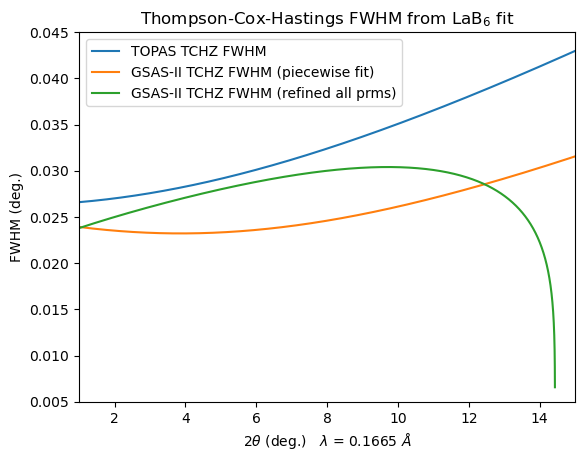

In [31]:
plt.figure()
plt.plot(tths, T_FWHMS, label='TOPAS TCHZ FWHM')
plt.plot(tths, G_FWHMS, label='GSAS-II TCHZ FWHM (piecewise fit)')
plt.plot(tths, G_FWHMS_2, label='GSAS-II TCHZ FWHM (refined all prms)')
plt.xlabel(r"2$\theta$ (deg.)   $\lambda$ = 0.1665 $\AA$")
plt.ylabel("FWHM (deg.)")
plt.title("Thompson-Cox-Hastings FWHM from LaB$_{6}$ fit")
plt.legend(loc='upper left')
plt.xlim(1,15)
plt.ylim(0.005,0.045)
